Define interactive variables to set up particle stepper (static and variable), and then have user define figure of merit.<br>
Write out in either .csv or .txt file (idea: in .csv file, have rows correspond to objects (ie, magnets, particle beam, etc) and have the first column represent the number of those objects (magnets, beams, etc), and the remaining columns an ordered list of values defining those objects, to read from left to right, spanning all of the relevant objects).<br>
Have c++ code read this, and define objects with 'for' loops.

Items to define for input deck:<br>
1. Magnet: Center of Entrance Plane, Length, Width, Height, magnetic field strength (vector) (x-component, y-component, z-component)
2. Beam: number of particles, central starting position, central energy, central direction (angles from axes (angle for x determined from angles for y and z, and is silently ignored))
3. Beam: spread in starting position, spread in central energy, spread in divergence (user input FWHM of Gaussian spread, code uses 0.5 of this in spread)
4. Screen: Low-Energy Middle, Width, Height, Angle from both z- and x-axes

## Your preferred units:
>Please run the next cell once to generate widget objects. Change the values in the dropdowns to the value to prefer. Do not run the cell again, the value is dynamically updated when you change the value in the dropdown menu!

In [1]:
from magspecinterface_functions import *
display( units_length )
display( units_energy )
display( units_angles )
display( units_magnetic_field )

SyntaxError: positional argument follows keyword argument (magspecinterface_functions.py, line 386)

## Spectrometer coordinate system
> You are free to define the location of the system origin. Global bounds may be negative.

In [2]:
display(global_max_x, global_min_x, global_max_y, global_min_y, global_max_z, global_min_z)

FloatText(value=100.0, description='global x max')

FloatText(value=0.0, description='global x min')

FloatText(value=100.0, description='global y max')

FloatText(value=0.0, description='global y min')

FloatText(value=100.0, description='global z max')

FloatText(value=0.0, description='global z min')

## Magnet setup:
> Number of magnets, dimensions, position, and magnetic field components.

![alt text](magnet_position.png "Magnet_Setup")

In [3]:
display( number_of_magnets )

BoundedIntText(value=2, description='# of Magnets', min=1)

In [4]:
magnet_dimensions_widgets = dynamicFloatValue_Magnet_Dimensions(number_of_magnets.value)
for ii in range(len(magnet_dimensions_widgets)):
    display( magnet_dimensions_widgets[ii] )

BoundedFloatText(value=0.0, description='width 1')

BoundedFloatText(value=0.0, description='length 1')

BoundedFloatText(value=0.0, description='height 1')

In [5]:
magnet_position_widgets = dynamicFloatValue_Magnet_Position(number_of_magnets.value)
for ii in range(len(magnet_position_widgets)):
    display( magnet_position_widgets[ii] )

BoundedFloatText(value=0.0, description='x pos 1')

FloatText(value=0.0, description='y pos 1')

FloatText(value=0.0, description='z pos 1')

In [6]:
magnetic_field_components_widgets = dynamicFloatValue_Magnetic_Field_Comps(number_of_magnets.value)
for ii in range(len(magnetic_field_components_widgets)):
    display( magnetic_field_components_widgets[ii] )

FloatText(value=0.0, description='x comp 1')

FloatText(value=0.0, description='y comp 1')

FloatText(value=0.0, description='z comp 1')

## Beam Setup:
>Number of particles, starting position, energy, direction.<br>
**Note:** Please input values referencing the beam center. Direction is given by angle from axes.

In [8]:
display( number_of_particles )

BoundedIntText(value=1, description='# of Particles', min=1)

In [9]:
beam_start_position_widgets = dynamicFloatValue_Beam_Start_Position()
for ii in range(len(beam_start_position_widgets)):
    display( beam_start_position_widgets[ii] )

FloatText(value=0.0, description='x start pos')

FloatText(value=0.0, description='y start pos')

FloatText(value=0.0, description='z start pos')

In [10]:
display(beam_energy)

BoundedFloatText(value=1.0, description='beam energy')

In [11]:
beam_direction_widgets = dynamicFloatValue_Beam_Direction()
for ii in range(len(beam_direction_widgets)):
    display( beam_direction_widgets[ii] )

FloatText(value=0.0, description='x angle')

FloatText(value=0.0, description='y angle')

FloatText(value=0.0, description='z angle')

## Beam Spread:
>Spread in starting position, energy, and divergence.

In [12]:
beam_position_spread_widgets = dynamicFloatValue_Beam_Position_Spread()
for ii in range(len(beam_position_spread_widgets)):
    display( beam_position_spread_widgets[ii] )

FloatText(value=0.0, description='x pos spread')

FloatText(value=0.0, description='y pos spread')

FloatText(value=0.0, description='z pos spread')

In [13]:
display( beam_energy_spread )

BoundedFloatText(value=0.0, description='nrg spread')

In [14]:
display( beam_divergence_spread )

BoundedFloatText(value=0.0, description='div spread')

## Screen Setup:
>Number of screens, dimensions, position, and angles from z- and x-axes.<br>
**Note:** Given angles are yaw (about the z-axis), pitch (about the y-axis), and roll (about the x-axis).

![alt text](screen_setup.png "Screen_Setup")

In [15]:
display( number_of_screens )

BoundedIntText(value=2, description='# of Screens', min=1)

In [16]:
screen_dimensions_widgets = dynamicFloatValue_Screen_Dimensions(number_of_screens.value)
for ii in range(len(screen_dimensions_widgets)):
    display( screen_dimensions_widgets[ii] )

BoundedFloatText(value=0.0, description='length 1')

BoundedFloatText(value=0.0, description='height 1')

In [17]:
screen_position_widgets = dynamicFloatValue_Screen_Position(number_of_screens.value)
for ii in range(len(screen_position_widgets)):
    display( screen_position_widgets[ii] )

FloatText(value=0.0, description='x pos 1')

FloatText(value=0.0, description='y pos 1')

FloatText(value=0.0, description='z pos 1')

In [18]:
screen_angles_widgets = dynamicFloatValue_Screen_Angles(number_of_screens.value)
for ii in range(len(screen_angles_widgets)):
    display( screen_angles_widgets[ii] )

FloatText(value=0.0, description='yaw angle 1')

FloatText(value=0.0, description='pitch angle 1')

FloatText(value=0.0, description='roll angle 1')

<IPython.core.display.Javascript object>


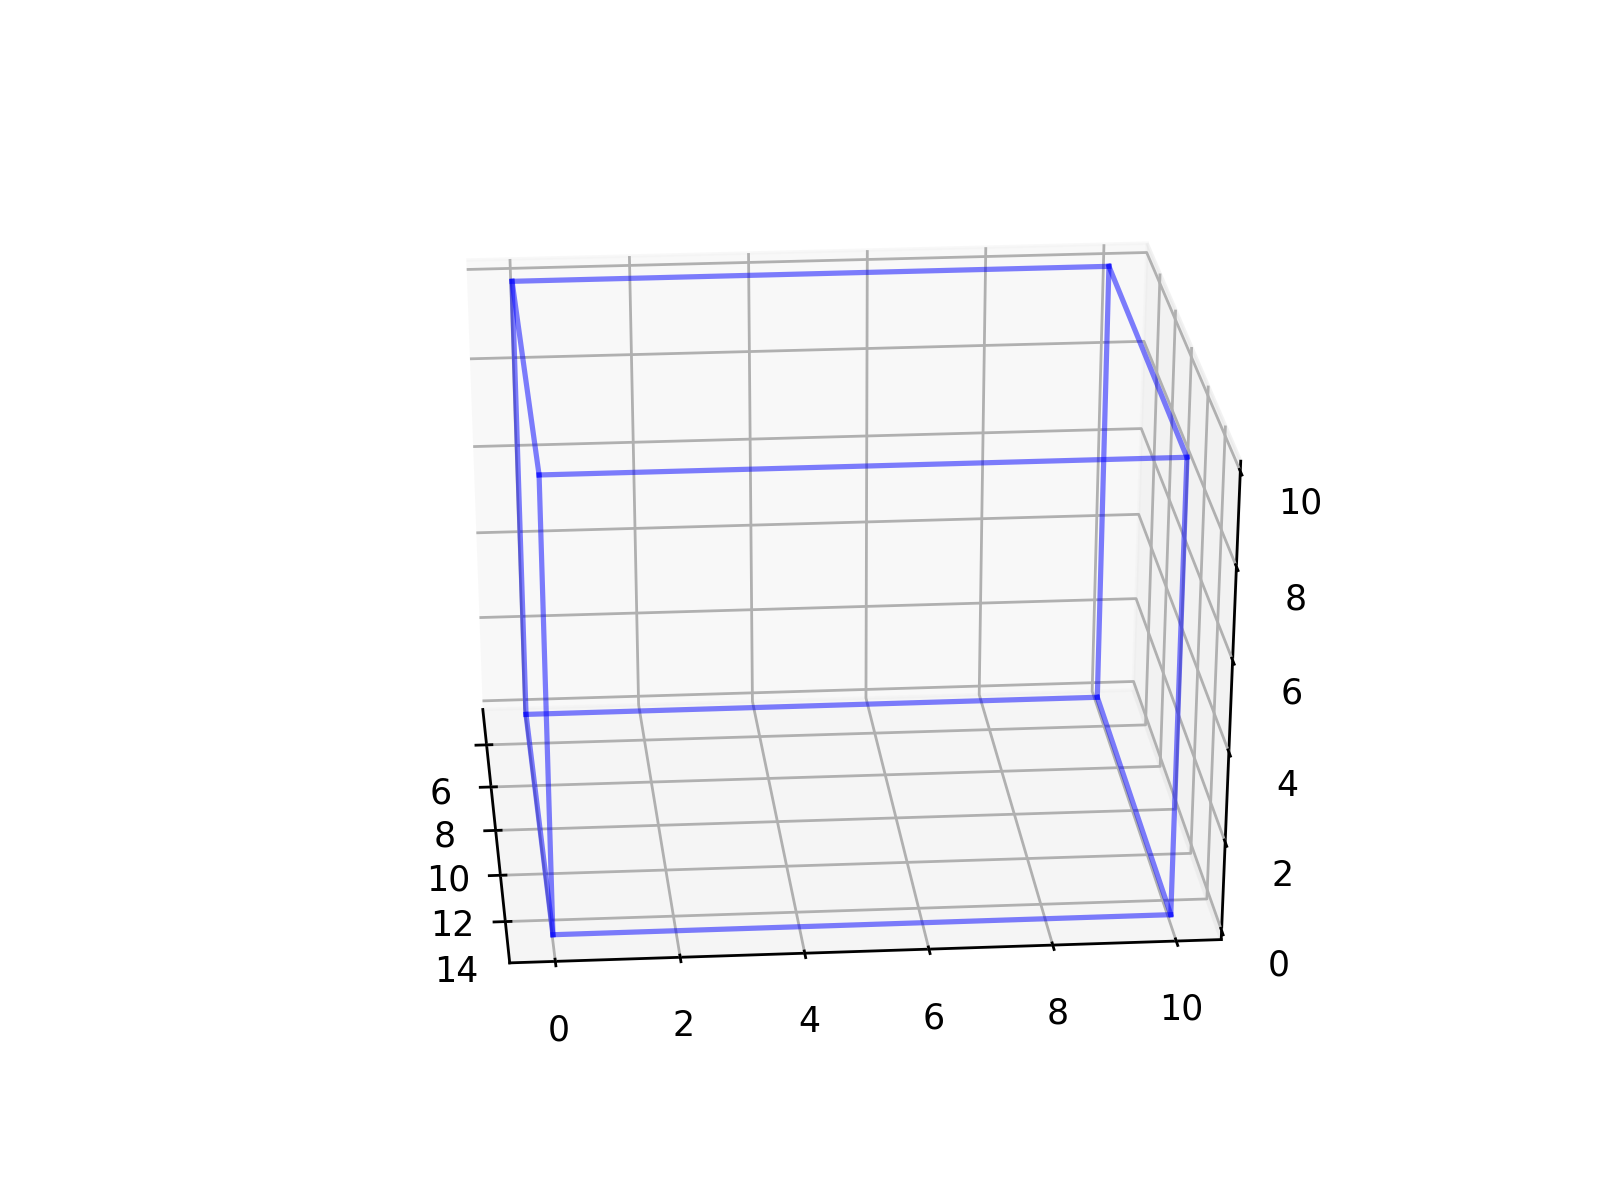

In [22]:
units = [units_length.value, ' ', units_energy.value, ' ', units_angles.value, ' ', units_magnetic_field.value]

converted_beam_direction, converted_screen_angles = convertAngles(units, beam_direction_widgets, screen_angles_widgets)

%matplotlib notebook
showDiagram(global_max_x.value, global_min_x.value, global_max_y.value, global_min_y.value, global_max_z.value,
            global_min_z.value, number_of_magnets.value, magnet_dimensions_widgets, magnet_position_widgets,
            beam_start_position_widgets, converted_beam_direction, number_of_screens.value, screen_dimensions_widgets,
            screen_position_widgets, converted_screen_angles)

## Output info
>**IMPORTANT:** Please only run the code below when you are ready to save your inputs.

In [ ]:
writeOutput(units, number_of_magnets.value, magnet_dimensions_widgets, magnet_position_widgets, 
            magnetic_field_components_widgets, number_of_particles.value, beam_start_position_widgets, beam_energy.value, 
            converted_beam_direction, beam_position_spread.value, beam_energy_spread.value, beam_divergence_spread.energy, 
            number_of_screens.value, screen_dimensions_widgets, screen_position_widgets, converted_screen_angles)